In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Load dataset
file = 'pendigits.tra'
header = ['feature_1','feature_2','feature_3','feature_4', 'feature_5',
          'feature_6','feature_7','feature_8','feature_9','feature_10','feature_11'
    ,'feature_12','feature_13','feature_14','feature_15','feature_16','class_name'] 
dataset=pd.read_csv(file,nrows = 5000,names=header)
dataset.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,class_name
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [15]:
dataset.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,class_name
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,37.579800,84.404000,40.120200,82.847800,50.972600,65.200200,51.45280,44.752200,57.198200,34.183400,61.103000,35.66500,54.672400,35.689200,47.140000,28.566000,4.426400
std,33.315786,17.068141,26.259064,19.706017,34.989168,27.307919,30.51536,30.727389,33.899073,27.424678,37.154619,27.52406,22.560356,33.364761,41.573695,35.865801,2.884068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,76.000000,20.000000,70.000000,17.000000,48.000000,28.00000,22.000000,29.000000,7.000000,24.000000,12.00000,41.000000,6.000000,0.000000,0.000000,2.000000
50%,32.000000,89.000000,39.000000,89.000000,57.000000,71.000000,54.00000,43.000000,61.000000,33.000000,74.000000,32.00000,52.500000,27.000000,39.000000,8.000000,4.000000
75%,62.000000,100.000000,58.000000,100.000000,81.000000,86.000000,75.00000,65.000000,88.000000,55.000000,98.000000,57.00000,69.000000,48.000000,100.000000,50.000000,7.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,9.000000


In [3]:
#for i in range(len(dataset)):
#    if dataset.loc[i,'class_name']=='1':
#        dataset.loc[i,'class_name']=0
    #elif dataset.loc[i,'class_name']=='F':
    #    dataset.loc[i,'class_name']=0
#    else:
#        dataset.loc[i,'class_name']=1

dataset.class_name.loc[(dataset['class_name'] == 1)] = 0
dataset.class_name.loc[(dataset['class_name'] == 2)] = 0
dataset.class_name.loc[(dataset['class_name'] == 3)] = 0
dataset.class_name.loc[(dataset['class_name'] == 4)] = 0
dataset.class_name.loc[(dataset['class_name'] == 5)] = 1
dataset.class_name.loc[(dataset['class_name'] == 6)] = 1
dataset.class_name.loc[(dataset['class_name'] == 7)] = 1
dataset.class_name.loc[(dataset['class_name'] == 8)] = 1
dataset.class_name.loc[(dataset['class_name'] == 9)] = 1



print(dataset['class_name'].value_counts())
#print(dataset.groupby('class_name').size())

0    2565
1    2435
Name: class_name, dtype: int64


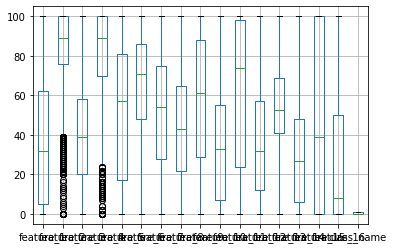

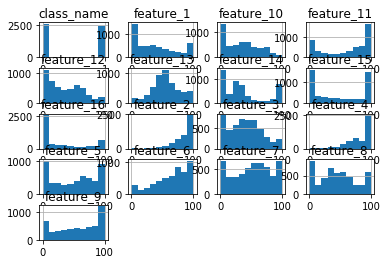

In [27]:
dataset.boxplot()
dataset.hist()
plt.show()

In [24]:
#split data
array = dataset.values
np.random.shuffle(array)
X = array[:,:-1]
Y = array[:,-1]
seed = 7
#np.random.seed(seed)
X_train_one,X_test_one,Y_train_one,Y_test_one = model_selection.train_test_split(X,Y,test_size=0.2)
X_train_two,X_test_two,Y_train_two,Y_test_two = model_selection.train_test_split(X,Y,test_size=0.5)
X_train_three,X_test_three,Y_train_three,Y_test_three = model_selection.train_test_split(X,Y,test_size=0.8)

#standardize
scaler_one = StandardScaler().fit(X_train_one)
rescaled_X_train_one = scaler_one.transform(X_train_one)

scaler_two = StandardScaler().fit(X_train_two)
rescaled_X_train_two = scaler_two.transform(X_train_two)

scaler_three = StandardScaler().fit(X_train_three)
rescaled_X_train_three = scaler_three.transform(X_train_three)

print(rescaled_X_train_one.shape,Y_train_one.shape)
print(rescaled_X_train_two.shape,Y_train_two.shape)
print(rescaled_X_train_three.shape,Y_train_three.shape)

partition = []
partition.append((rescaled_X_train_one,Y_train_one,'test size 0.2'))
partition.append((rescaled_X_train_two,Y_train_two, 'test size 0.5'))
partition.append((rescaled_X_train_three,Y_train_three, 'test size 0.8'))
print(partition[0][1])

(4000, 16) (4000,)
(2500, 16) (2500,)
(1000, 16) (1000,)
[1 0 1 ... 1 0 1]


In [25]:
valset = []
rescaled_X_val_one = scaler_one.transform(X_test_one)
rescaled_X_val_two = scaler_two.transform(X_test_two)
rescaled_X_val_three = scaler_three.transform(X_test_three)
valset.append((rescaled_X_val_one,Y_test_one,'test size 0.2'))
valset.append((rescaled_X_val_two,Y_test_two, 'test size 0.5'))
valset.append((rescaled_X_val_three,Y_test_three, 'test size 0.8'))

print((valset[0][0].shape,valset[0][1].shape))

((1000, 16), (1000,))


In [26]:
svm = {'C': [0.1,1,10,100,1000]}#'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'C': [0.1,1,10,100,1000]}

#Xgboost
xgboost = {'max_depth': [1,3,5,7,10],'gamma': [0.01,0.1,0.5,1,2]}#'reg_alpha': [0, 0.5, 1],'reg_lambda': [1, 2,3],'colsample_bytree': [0.3, 0.6, 0.8, 1.0],
       #'learning_rate': [0.01,0.05,0.1,0.2],#'min_child_weight': [1,3,5],
       #,'max_features': ['auto','log2','sqrt'],'subsample': [0.1,0.5,0.75,1],
       #'n_estimators': [100, 250, 500, 1000]}

#random forest
RF = {'max_depth': [10,50,100]}
      #'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

#DecisionTree
DT = {'max_depth': [None,4,8,12]}#'criterion': ['gini', 'entropy'],'splitter': ['best','random'],'max_depth': [None,4,8,12],
      #'min_samples_split': [2,5,10],'min_samples_leaf':[1,2,4],'max_features': ['auto','log2','sqrt']}

#KNN
KNN = {'n_neighbors':[1,5,10]}#, 'weights':['uniform','distance']}#,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

#logistic regression
LR = {'C':[0.01,0.1,1,10,100,1000]}

estimators = []
estimators.append(('xgb',xgboost,xgb.XGBClassifier()))
estimators.append(('LR',LR,LogisticRegression()))
estimators.append(('DT',DT,DecisionTreeClassifier()))
estimators.append(('SVM',svm,SVC()))
estimators.append(('KNN',KNN,KNeighborsClassifier()))
estimators.append(('RF',RF,RandomForestClassifier()))
results = []
results_name=[]
results_testsize = []

In [9]:
validation=[]


In [27]:
#rerun
for train in partition:
    #for i in range(3):
    for name,param_grid,model in estimators:
        kfold = model_selection.KFold(n_splits = 5)
        grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = "accuracy",cv = kfold, return_train_score=True)
        grid_result = grid.fit(train[0],train[1])
        results.append((grid_result,grid_result.best_params_,grid_result.best_score_))
        results_name.append(name)
        results_testsize.append(train[2])
        print(name,grid_result.best_params_,grid_result.best_score_,train[2])
        validation.append((name,grid_result.best_score_,train[2]))
        #param.append(grid_result.best_params_)
        param_list.append(grid_result.best_params_)

xgb {'gamma': 0.1, 'max_depth': 5} 0.99075 test size 0.2


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

LR {'C': 1} 0.8525 test size 0.2
DT {'max_depth': None} 0.96725 test size 0.2


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM {'C': 1} 0.9965 test size 0.2
KNN {'n_neighbors': 1} 0.99675 test size 0.2


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

RF {'max_depth': 100} 0.9915 test size 0.2
xgb {'gamma': 0.01, 'max_depth': 5} 0.9876 test size 0.5


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

LR {'C': 1} 0.8536 test size 0.5
DT {'max_depth': 12} 0.9564 test size 0.5


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM {'C': 10} 0.996 test size 0.5
KNN {'n_neighbors': 5} 0.9964 test size 0.5


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

RF {'max_depth': 10} 0.9848 test size 0.5
xgb {'gamma': 1, 'max_depth': 3} 0.978 test size 0.8
LR {'C': 1} 0.84 test size 0.8
DT {'max_depth': None} 0.934 test size 0.8


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM {'C': 100} 0.989 test size 0.8
KNN {'n_neighbors': 1} 0.991 test size 0.8


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

RF {'max_depth': 50} 0.98 test size 0.8


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [28]:
param_list[36:]

[{'gamma': 0.1, 'max_depth': 5},
 {'C': 1},
 {'max_depth': None},
 {'C': 1},
 {'n_neighbors': 1},
 {'max_depth': 100},
 {'gamma': 0.01, 'max_depth': 5},
 {'C': 1},
 {'max_depth': 12},
 {'C': 10},
 {'n_neighbors': 5},
 {'max_depth': 10},
 {'gamma': 1, 'max_depth': 3},
 {'C': 1},
 {'max_depth': None},
 {'C': 100},
 {'n_neighbors': 1},
 {'max_depth': 50}]

In [12]:
final_result_p1=[]
final_result_p2=[]
final_result_p3=[]


In [29]:
#rerun
temp=[]
best_xgb=[]
best_LR=[]
best_DT=[]
best_SVM=[]
best_KNN=[]
best_RF=[]

In [30]:
#rerun
best_xgb.append(xgb.XGBClassifier(gamma = 0.1,max_depth=5))
best_xgb.append(xgb.XGBClassifier(gamma = 0.01,max_depth=5))
best_xgb.append(xgb.XGBClassifier(gamma = 1,max_depth=3))
temp=[]
count=0
for train in partition:        
    best_fit = best_xgb[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1

final_result_p1.append(('xgb',temp[0][0],validation[0][1],temp[0][1]))
final_result_p2.append(('xgb',temp[1][0],validation[6][1],temp[1][1]))
final_result_p3.append(('xgb',temp[2][0],validation[12][1],temp[2][1]))

best_LR.append(LogisticRegression(C=1))
best_LR.append(LogisticRegression(C=1))
best_LR.append(LogisticRegression(C=1))
count=0
temp = []
for train in partition:        
    best_fit = best_LR[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1
final_result_p1.append(('LR',temp[0][0],validation[1][1],temp[0][1]))
final_result_p2.append(('LR',temp[1][0],validation[7][1],temp[1][1]))
final_result_p3.append(('LR',temp[2][0],validation[13][1],temp[2][1]))


best_DT.append(DecisionTreeClassifier(max_depth=None))
best_DT.append(DecisionTreeClassifier(max_depth=12))
best_DT.append(DecisionTreeClassifier(max_depth=None))
count=0
temp = []
for train in partition:        
    best_fit = best_DT[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1
final_result_p1.append(('DT',temp[0][0],validation[2][1],temp[0][1]))
final_result_p2.append(('DT',temp[1][0],validation[8][1],temp[1][1]))
final_result_p3.append(('DT',temp[2][0],validation[14][1],temp[2][1]))

best_SVM.append(SVC(C=1))
best_SVM.append(SVC(C=10))
best_SVM.append(SVC(C=100))
count=0
temp = []
for train in partition:        
    best_fit = best_SVM[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1
final_result_p1.append(('SVM',temp[0][0],validation[3][1],temp[0][1]))
final_result_p2.append(('SVM',temp[1][0],validation[9][1],temp[1][1]))
final_result_p3.append(('SVM',temp[2][0],validation[15][1],temp[2][1]))

best_KNN.append(KNeighborsClassifier(n_neighbors=1))
best_KNN.append(KNeighborsClassifier(n_neighbors=5))
best_KNN.append(KNeighborsClassifier(n_neighbors=1))
count=0
temp = []
for train in partition:        
    best_fit = best_KNN[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1
final_result_p1.append(('KNN',temp[0][0],validation[4][1],temp[0][1]))
final_result_p2.append(('KNN',temp[1][0],validation[10][1],temp[1][1]))
final_result_p3.append(('KNN',temp[2][0],validation[16][1],temp[2][1]))

best_RF.append(RandomForestClassifier(max_depth=100))
best_RF.append(RandomForestClassifier(max_depth=10))
best_RF.append(RandomForestClassifier(max_depth=50))
count=0
temp = []
for train in partition:        
    best_fit = best_RF[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1
final_result_p1.append(('RF',temp[0][0],validation[5][1],temp[0][1]))
final_result_p2.append(('RF',temp[1][0],validation[11][1],temp[1][1]))
final_result_p3.append(('RF',temp[2][0],validation[17][1],temp[2][1]))

C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\si

In [31]:
train_acc_p1=[]
val_acc_p1=[]
test_acc_p1=[]
for i in range(6):
    train_acc_p1.append(((final_result_p1[i][1]+final_result_p1[i+6][1]+final_result_p1[i+12][1])/3,
                        np.std(np.array([final_result_p1[i][1],final_result_p1[i+6][1],final_result_p1[i+12][1]]))))
    val_acc_p1.append(((final_result_p1[i][2]+final_result_p1[i+6][2]+final_result_p1[i+12][2])/3,
                     np.std(np.array([final_result_p1[i][2],final_result_p1[i+6][2],final_result_p1[i+12][2]]))))
    test_acc_p1.append(((final_result_p1[i][3]+final_result_p1[i+6][3]+final_result_p1[i+12][3])/3,
                      np.std(np.array([final_result_p1[i][3],final_result_p1[i+6][3],final_result_p1[i+12][3]]))))
train_acc_p2=[]
val_acc_p2=[]
test_acc_p2=[]    
for i in range(6):
    train_acc_p2.append(((final_result_p2[i][1]+final_result_p2[i+6][1]+final_result_p2[i+12][1])/3,
                        np.std(np.array([final_result_p2[i][1],final_result_p2[i+6][1],final_result_p2[i+12][1]]))))
    val_acc_p2.append(((final_result_p2[i][2]+final_result_p2[i+6][2]+final_result_p2[i+12][2])/3,
                     np.std(np.array([final_result_p2[i][2],final_result_p2[i+6][2],final_result_p2[i+12][2]]))))
    test_acc_p2.append(((final_result_p2[i][3]+final_result_p2[i+6][3]+final_result_p2[i+12][3])/3,
                      np.std(np.array([final_result_p2[i][3],final_result_p2[i+6][3],final_result_p2[i+12][3]]))))
    
train_acc_p3=[]
val_acc_p3=[]
test_acc_p3=[]    
for i in range(6):
    train_acc_p3.append(((final_result_p3[i][1]+final_result_p3[i+6][1]+final_result_p3[i+12][1])/3,
                        np.std(np.array([final_result_p3[i][1],final_result_p3[i+6][1],final_result_p3[i+12][1]]))))
    val_acc_p3.append(((final_result_p3[i][2]+final_result_p3[i+6][2]+final_result_p3[i+12][2])/3,
                     np.std(np.array([final_result_p3[i][2],final_result_p3[i+6][2],final_result_p3[i+12][2]]))))
    test_acc_p3.append(((final_result_p3[i][3]+final_result_p3[i+6][3]+final_result_p3[i+12][3])/3,
                      np.std(np.array([final_result_p3[i][3],final_result_p3[i+6][3],final_result_p3[i+12][3]]))))

In [32]:
print(train_acc_p1)
print(val_acc_p1)
print(test_acc_p1)
print(train_acc_p2)
print(val_acc_p2)
print(test_acc_p2)
print(train_acc_p3)
print(val_acc_p3)
print(test_acc_p3)

[(1.0, 0.0), (0.852, 0.002010389680302488), (1.0, 0.0), (0.9994166666666667, 0.0006561673228342971), (0.99925, 0.001060660171779809), (0.9999166666666667, 0.00011785113019774494)]
[(0.992, 0.0), (0.84925, 0.0), (0.9732499999999998, 1.1102230246251565e-16), (0.997, 0.0), (0.9965, 0.0), (0.99275, 0.0)]
[(0.9883333333333333, 0.002624669291337273), (0.855, 0.0008164965809277268), (0.9803333333333333, 0.004027681991198194), (0.996, 0.0016329931618554536), (0.9966666666666667, 0.0012472191289246482), (0.9876666666666667, 0.0020548046676563273)]
[(1.0, 0.0), (0.8581333333333333, 0.003492213560989003), (1.0, 0.0), (0.9994666666666667, 0.0007542472332656723), (0.9989333333333333, 0.0015084944665312923), (0.9998666666666667, 0.00018856180831639194)]
[(0.9860000000000001, 1.1102230246251565e-16), (0.8527999999999999, 1.1102230246251565e-16), (0.9659999999999999, 1.1102230246251565e-16), (0.9964, 0.0), (0.9948, 0.0), (0.9832, 0.0)]
[(0.9881333333333333, 0.0006798692684790501), (0.8492000000000001,

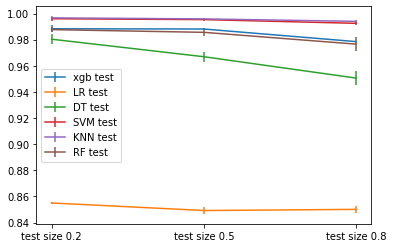

In [33]:
fig = plt.figure()

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[0][0],test_acc_p2[0][0],test_acc_p3[0][0]]
             , yerr=[test_acc_p1[0][1],test_acc_p2[0][1],test_acc_p3[0][1]],label='xgb test')

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[1][0],test_acc_p2[1][0],test_acc_p3[1][0]]
             , yerr=[test_acc_p1[1][1],test_acc_p2[1][1],test_acc_p3[1][1]],label='LR test')

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[2][0],test_acc_p2[2][0],test_acc_p3[2][0]]
             , yerr=[test_acc_p1[2][1],test_acc_p2[2][1],test_acc_p3[2][1]],label='DT test')

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[3][0],test_acc_p2[3][0],test_acc_p3[3][0]]
             , yerr=[test_acc_p1[3][1],test_acc_p2[3][1],test_acc_p3[3][1]],label='SVM test')

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[4][0],test_acc_p2[4][0],test_acc_p3[4][0]]
             , yerr=[test_acc_p1[4][1],test_acc_p2[4][1],test_acc_p3[4][1]],label='KNN test')

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[5][0],test_acc_p2[5][0],test_acc_p3[5][0]]
             , yerr=[test_acc_p1[5][1],test_acc_p2[5][1],test_acc_p3[5][1]],label='RF test')
plt.legend()
plt.show()


In [ ]:
#below is cross_val randomness

In [ ]:
xgb {'gamma': 0.01, 'max_depth': 7} 0.99175 test size 0.2
LR {'C': 1} 0.8525 test size 0.2
DT {'max_depth': None} 0.97825 test size 0.2
SVM {'C': 1} 0.99625 test size 0.2
KNN {'n_neighbors': 1} 0.9955 test size 0.2
RF {'max_depth': 100} 0.99275 test size 0.2

xgb {'gamma': 0.01, 'max_depth': 7} 0.99175 test size 0.2
LR {'C': 1} 0.8525 test size 0.2
DT {'max_depth': 12} 0.9775 test size 0.2
SVM {'C': 1} 0.99625 test size 0.2
KNN {'n_neighbors': 1} 0.9955 test size 0.2
RF {'max_depth': 10} 0.99075 test size 0.2

xgb {'gamma': 0.01, 'max_depth': 7} 0.99175 test size 0.2
LR {'C': 1} 0.8525 test size 0.2
DT {'max_depth': None} 0.97875 test size 0.2
SVM {'C': 1} 0.99625 test size 0.2
KNN {'n_neighbors': 1} 0.9955 test size 0.2
RF {'max_depth': 50} 0.98975 test size 0.2

In [31]:
# Draw the heatmap of training errors.
def draw_heatmap(training_errors, gamma_list, C_list, x_name, y_name, title):
    plt.figure(figsize = (5,5))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = '%s'%(x_name), ylabel='%s'%(y_name))#'$\gamma$', ylabel='$C$')
    plt.title('Validation accuracy of %s' % (title))
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

In [32]:
# Draw the heatmap of training errors.
def draw_heatmap1d(training_errors, gamma_list, y_name,title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f', 
                     yticklabels=gamma_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set( ylabel='%s'%(y_name))#'$\gamma$', ylabel='$C$')
    plt.title('Validation accuracy of %s' % (title))
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

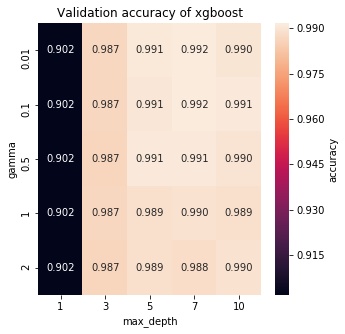

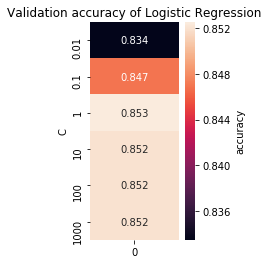

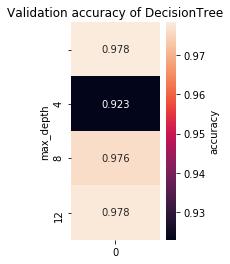

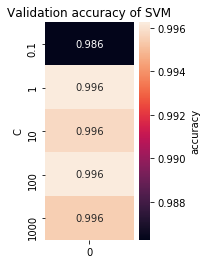

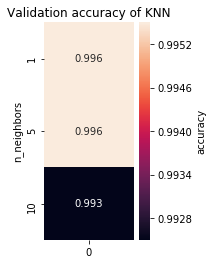

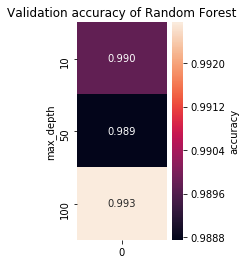

In [33]:
#Some examples of the heatmap
val_acc =np.reshape(results[0][0].cv_results_['mean_test_score'],(5,5))
draw_heatmap(val_acc,[1,3,5,7,10],[0.01,0.1,0.5,1,2],'max_depth','gamma','xgboost' )

val_acc =np.reshape(results[1][0].cv_results_['mean_test_score'],(-1,1))
draw_heatmap1d(val_acc,[0.01,0.1,1,10,100,1000],'C','Logistic Regression')

val_acc =np.reshape(results[2][0].cv_results_['mean_test_score'],(-1,1))
draw_heatmap1d(val_acc,[None,4,8,12],'max_depth','DecisionTree')

val_acc =np.reshape(results[3][0].cv_results_['mean_test_score'],(-1,1))
draw_heatmap1d(val_acc,[0.1,1,10,100,1000],'C','SVM')

val_acc =np.reshape(results[4][0].cv_results_['mean_test_score'],(-1,1))
draw_heatmap1d(val_acc,[1,5,10],'n_neighbors','KNN')

val_acc =np.reshape(results[5][0].cv_results_['mean_test_score'],(-1,1))
draw_heatmap1d(val_acc,[10,50,100],'max_depth','Random Forest')

In [34]:
val_acc_xgb_p1 = (validation[0][1]+validation[6][1]+validation[12][1])/3
val_acc_xgb_p2 = (validation[18][1]+validation[24][1]+validation[30][1])/3
val_acc_xgb_p3 = (validation[36][1]+validation[42][1]+validation[48][1])/3

val_acc_LR_p1 = (validation[1][1]+validation[7][1]+validation[13][1])/3
val_acc_LR_p2 = (validation[19][1]+validation[25][1]+validation[31][1])/3
val_acc_LR_p3 = (validation[37][1]+validation[43][1]+validation[49][1])/3

val_acc_DT_p1 = (validation[2][1]+validation[8][1]+validation[14][1])/3
val_acc_DT_p2 = (validation[20][1]+validation[26][1]+validation[32][1])/3
val_acc_DT_p3 = (validation[38][1]+validation[44][1]+validation[50][1])/3

val_acc_SVM_p1 = (validation[3][1]+validation[9][1]+validation[15][1])/3
val_acc_SVM_p2 = (validation[21][1]+validation[27][1]+validation[33][1])/3
val_acc_SVM_p3 = (validation[39][1]+validation[45][1]+validation[51][1])/3

val_acc_KNN_p1 = (validation[4][1]+validation[10][1]+validation[16][1])/3
val_acc_KNN_p2 = (validation[22][1]+validation[28][1]+validation[34][1])/3
val_acc_KNN_p3 = (validation[40][1]+validation[46][1]+validation[52][1])/3

val_acc_RF_p1 = (validation[5][1]+validation[11][1]+validation[17][1])/3
val_acc_RF_p2 = (validation[23][1]+validation[29][1]+validation[35][1])/3
val_acc_RF_p3 = (validation[41][1]+validation[47][1]+validation[53][1])/3

In [35]:
valset = []
rescaled_X_val_one = scaler_one.transform(X_test_one)
rescaled_X_val_two = scaler_two.transform(X_test_two)
rescaled_X_val_three = scaler_three.transform(X_test_three)
valset.append((rescaled_X_val_one,Y_test_one,'test size 0.2'))
valset.append((rescaled_X_val_two,Y_test_two, 'test size 0.5'))
valset.append((rescaled_X_val_three,Y_test_three, 'test size 0.8'))

print((valset[0][0].shape,valset[0][1].shape))

((1000, 16), (1000,))


In [36]:
best = xgb.XGBClassifier(gamma = 0.01,max_depth=7)
#xgb_best_fit_result = []
xgb_loss = []
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
       # xgb_loss.append(best.evals_result())
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        #test_error = accuracy_score(best_fit.predict(data_test[:,:-1]),data_test[:,-1])
        temp.append((train_error, test_error))
    count = count+1

final_result_p1=[]
final_result_p2=[]
final_result_p3=[]
train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
#test_error_p1 = (temp[0][2]+temp[1][2]+temp[2][2])/3
#test_error_p2 = (temp[3][2]+temp[4][2]+temp[5][2])/3
#test_error_p3 = (temp[6][2]+temp[7][2]+temp[8][2])/3
final_result_p1.append(('xgb',train_error_p1,val_acc_xgb_p1,test_error_p1))
final_result_p2.append(('xgb',train_error_p2,val_acc_xgb_p2,test_error_p2))
final_result_p3.append(('xgb',train_error_p3,val_acc_xgb_p3,test_error_p3))

In [37]:
best = LogisticRegression(C=1)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        temp.append((train_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('LR',train_error_p1,val_acc_LR_p1,test_error_p1))
final_result_p2.append(('LR',train_error_p2,val_acc_LR_p2,test_error_p2))
final_result_p3.append(('LR',train_error_p3,val_acc_LR_p3,test_error_p3))

C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

In [38]:
best = DecisionTreeClassifier(max_depth=None)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        temp.append((train_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('DT',train_error_p1,val_acc_DT_p1,test_error_p1))
final_result_p2.append(('DT',train_error_p2,val_acc_DT_p2,test_error_p2))
final_result_p3.append(('DT',train_error_p3,val_acc_DT_p3,test_error_p3))

In [39]:
best = SVC(C=1)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        temp.append((train_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('SVM',train_error_p1,val_acc_SVM_p1,test_error_p1))
final_result_p2.append(('SVM',train_error_p2,val_acc_SVM_p2,test_error_p2))
final_result_p3.append(('SVM',train_error_p3,val_acc_SVM_p3,test_error_p3))

In [40]:
best = KNeighborsClassifier(n_neighbors=1)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        temp.append((train_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('KNN',train_error_p1,val_acc_KNN_p1,test_error_p1))
final_result_p2.append(('KNN',train_error_p2,val_acc_KNN_p2,test_error_p2))
final_result_p3.append(('KNN',train_error_p3,val_acc_KNN_p3,test_error_p3))

In [41]:
best = RandomForestClassifier(max_depth=100)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        temp.append((train_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('RF',train_error_p1,val_acc_RF_p1,test_error_p1))
final_result_p2.append(('RF',train_error_p2,val_acc_RF_p2,test_error_p2))
final_result_p3.append(('RF',train_error_p3,val_acc_RF_p3,test_error_p3))

C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
final_result_p1

[('xgb', 1.0, 0.99175, 0.992),
 ('LR', 0.8522500000000001, 0.8525, 0.862),
 ('DT', 1.0, 0.9781666666666666, 0.9773333333333333),
 ('SVM', 0.9985, 0.99625, 0.997),
 ('KNN', 1.0, 0.9955000000000002, 0.996),
 ('RF', 0.9994999999999999, 0.9910833333333334, 0.9873333333333334)]

In [43]:
table_p1 = pd.DataFrame(np.array(final_result_p1),columns=['classifier','train_accuracy', 'val_accuracy', 'test_accuracy'])
table_p2 = pd.DataFrame(np.array(final_result_p2),columns=['classifier','train_accuracy', 'val_accuracy', 'test_accuracy'])
table_p3 = pd.DataFrame(np.array(final_result_p3),columns=['classifier','train_accuracy', 'val_accuracy', 'test_accuracy'])
table_p1

,classifier,train_accuracy,val_accuracy,test_accuracy
0,xgb,1.0,0.99175,0.992
1,LR,0.8522500000000001,0.8525,0.862
2,DT,1.0,0.9781666666666666,0.9773333333333333
3,SVM,0.9985,0.99625,0.997
4,KNN,1.0,0.9955000000000002,0.996
5,RF,0.9994999999999999,0.9910833333333334,0.9873333333333334


In [44]:
table_p2

,classifier,train_accuracy,val_accuracy,test_accuracy
0,xgb,1.0,0.9895999999999999,0.9856000000000001
1,LR,0.8556,0.8544,0.8476
2,DT,1.0,0.9716,0.9655999999999999
3,SVM,0.9975999999999999,0.9968,0.996
4,KNN,1.0,0.9964,0.996
5,RF,1.0,0.9889333333333333,0.9885333333333333


In [45]:
table_p3

,classifier,train_accuracy,val_accuracy,test_accuracy
0,xgb,1.0,0.98,0.9732499999999998
1,LR,0.86,0.846,0.8497499999999999
2,DT,1.0,0.9593333333333334,0.945
3,SVM,0.9979999999999999,0.993,0.98975
4,KNN,1.0,0.993,0.993
5,RF,1.0,0.985,0.97375


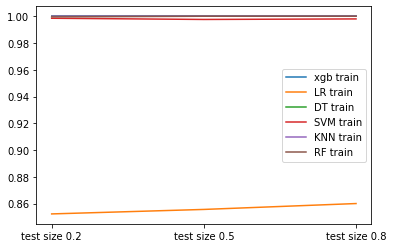

In [46]:
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[0][1],final_result_p2[0][1],final_result_p3[0][1]],label='xgb train')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[1][1],final_result_p2[1][1],final_result_p3[1][1]],label='LR train')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[2][1],final_result_p2[2][1],final_result_p3[2][1]],label='DT train')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[3][1],final_result_p2[3][1],final_result_p3[3][1]],label='SVM train')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[4][1],final_result_p2[4][1],final_result_p3[4][1]],label='KNN train')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[5][1],final_result_p2[5][1],final_result_p3[5][1]],label='RF train')
plt.legend()
plt.show()

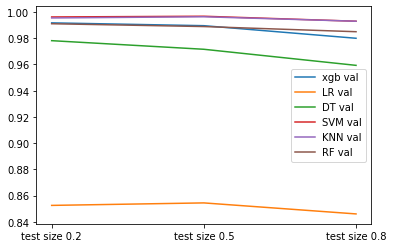

In [47]:
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[0][2],final_result_p2[0][2],final_result_p3[0][2]],label='xgb val')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[1][2],final_result_p2[1][2],final_result_p3[1][2]],label='LR val')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[2][2],final_result_p2[2][2],final_result_p3[2][2]],label='DT val')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[3][2],final_result_p2[3][2],final_result_p3[3][2]],label='SVM val')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[4][2],final_result_p2[4][2],final_result_p3[4][2]],label='KNN val')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[5][2],final_result_p2[5][2],final_result_p3[5][2]],label='RF val')
plt.legend()
plt.show()

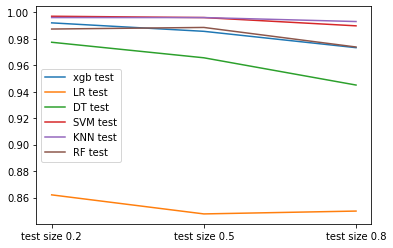

In [48]:

plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[0][3],final_result_p2[0][3],final_result_p3[0][3]],label='xgb test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[1][3],final_result_p2[1][3],final_result_p3[1][3]],label='LR test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[2][3],final_result_p2[2][3],final_result_p3[2][3]],label='DT test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[3][3],final_result_p2[3][3],final_result_p3[3][3]],label='SVM test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[4][3],final_result_p2[4][3],final_result_p3[4][3]],label='KNN test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[5][3],final_result_p2[5][3],final_result_p3[5][3]],label='RF test')
plt.legend()
plt.show()

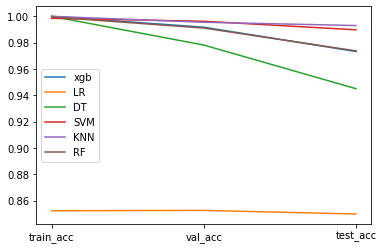

In [49]:
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[0][1],final_result_p1[0][2],final_result_p3[0][3]],label='xgb')
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[1][1],final_result_p1[1][2],final_result_p3[1][3]],label='LR')
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[2][1],final_result_p1[2][2],final_result_p3[2][3]],label='DT')
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[3][1],final_result_p1[3][2],final_result_p3[3][3]],label='SVM')
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[4][1],final_result_p1[4][2],final_result_p3[4][3]],label='KNN')
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[5][1],final_result_p1[5][2],final_result_p3[5][3]],label='RF')
plt.legend()
plt.show()

In [ ]:
best = xgb.XGBClassifier(gamma = 0.5,max_depth=10)
#xgb_best_fit_result = []
xgb_loss = []
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        xgb_loss.append(best.evals_result())
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        val_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        test_error = accuracy_score(best_fit.predict(data_test[:,:-1]),data_test[:,-1])
        temp.append((train_error, val_error, test_error))
    count = count+1

final_result_p1=[]
final_result_p2=[]
final_result_p3=[]
train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
val_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
val_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
val_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
test_error_p1 = (temp[0][2]+temp[1][2]+temp[2][2])/3
test_error_p2 = (temp[3][2]+temp[4][2]+temp[5][2])/3
test_error_p3 = (temp[6][2]+temp[7][2]+temp[8][2])/3
final_result_p1.append((train_error_p1,val_error_p1, test_error_p1,'xgb'))
final_result_p2.append((train_error_p2,val_error_p2, test_error_p2,'xgb'))
final_result_p3.append((train_error_p3,val_error_p3, test_error_p3,'xgb'))

best = LogisticRegression(C=10)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        val_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        test_error = accuracy_score(best_fit.predict(data_test[:,:-1]),data_test[:,-1])
        temp.append((train_error, val_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
val_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
val_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
val_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
test_error_p1 = (temp[0][2]+temp[1][2]+temp[2][2])/3
test_error_p2 = (temp[3][2]+temp[4][2]+temp[5][2])/3
test_error_p3 = (temp[6][2]+temp[7][2]+temp[8][2])/3
final_result_p1.append((train_error_p1,val_error_p1, test_error_p1,'LR'))
final_result_p2.append((train_error_p2,val_error_p2, test_error_p2,'LR'))
final_result_p3.append((train_error_p3,val_error_p3, test_error_p3,'LR'))

best = DecisionTreeClassifier(max_depth=8)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        val_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        test_error = accuracy_score(best_fit.predict(data_test[:,:-1]),data_test[:,-1])
        temp.append((train_error, val_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
val_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
val_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
val_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
test_error_p1 = (temp[0][2]+temp[1][2]+temp[2][2])/3
test_error_p2 = (temp[3][2]+temp[4][2]+temp[5][2])/3
test_error_p3 = (temp[6][2]+temp[7][2]+temp[8][2])/3
final_result_p1.append((train_error_p1,val_error_p1, test_error_p1,'DT'))
final_result_p2.append((train_error_p2,val_error_p2, test_error_p2,'DT'))
final_result_p3.append((train_error_p3,val_error_p3, test_error_p3,'DT'))

best = SVC(C=10)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        val_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        test_error = accuracy_score(best_fit.predict(data_test[:,:-1]),data_test[:,-1])
        temp.append((train_error, val_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
val_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
val_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
val_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
test_error_p1 = (temp[0][2]+temp[1][2]+temp[2][2])/3
test_error_p2 = (temp[3][2]+temp[4][2]+temp[5][2])/3
test_error_p3 = (temp[6][2]+temp[7][2]+temp[8][2])/3
final_result_p1.append((train_error_p1,val_error_p1, test_error_p1,'SVM'))
final_result_p2.append((train_error_p2,val_error_p2, test_error_p2,'SVM'))
final_result_p3.append((train_error_p3,val_error_p3, test_error_p3,'SVM'))

best = KNeighborsClassifier(n_neighbors=5)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        val_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        test_error = accuracy_score(best_fit.predict(data_test[:,:-1]),data_test[:,-1])
        temp.append((train_error, val_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
val_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
val_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
val_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
test_error_p1 = (temp[0][2]+temp[1][2]+temp[2][2])/3
test_error_p2 = (temp[3][2]+temp[4][2]+temp[5][2])/3
test_error_p3 = (temp[6][2]+temp[7][2]+temp[8][2])/3
final_result_p1.append((train_error_p1,val_error_p1, test_error_p1,'KNN'))
final_result_p2.append((train_error_p2,val_error_p2, test_error_p2,'KNN'))
final_result_p3.append((train_error_p3,val_error_p3, test_error_p3,'KNN'))

best = RandomForestClassifier(max_depth=10)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        val_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        test_error = accuracy_score(best_fit.predict(data_test[:,:-1]),data_test[:,-1])
        temp.append((train_error, val_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
#temp[0][0]+temp[1][0]+temp[2][0] #std
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
val_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
val_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
val_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
test_error_p1 = (temp[0][2]+temp[1][2]+temp[2][2])/3
test_error_p2 = (temp[3][2]+temp[4][2]+temp[5][2])/3
test_error_p3 = (temp[6][2]+temp[7][2]+temp[8][2])/3
final_result_p1.append((train_error_p1,val_error_p1, test_error_p1,'RF'))
final_result_p2.append((train_error_p2,val_error_p2, test_error_p2,'RF'))
final_result_p3.append((train_error_p3,val_error_p3, test_error_p3,'RF'))